In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [57]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Used metrics

**RMSE**
<br>
Root-mean-square error, estimates absolute errors. The lower, the better.
<br>
<br>
**PSNR**
<br>
Peak signal-to-noise ratio, estimates absolute errors. The higher, the better.
<br>
<br>
**SSIM**
Structural similarity index measure. As its name suggest, this measure tries to get some information out of the structure of the data. Especially for images, it is might be a better indicator than the previous two metrics. It considers spatial closeness, contextual information. Values are between 0 and 1, where 1 means exact match. Calculated based on [this article].(https://en.wikipedia.org/wiki/Structural_similarity).
<br>

#Used Data

Overall, 3 types of data were used to the evaluation part:


*   own [3pcs] >> Generated depth images from Assignment 1, with window size 11)
*   gt [3pcs] >> Ground truth depth images from Middlebury 2006 dataset
*   diml [6pcs] >> indoor images from the library training set (https://dimlrgbd.github.io/)

For upsampling, the initial resized depth image was 12.5% of the original image. I.e. in case of aloe:

*   original size:641*555
*   resized: 80*69

In our case, the rgb image was used as a guide to upsample the depth image.

# Subtask 1

##Data

In [53]:

metrics = ['rmse', 'psnr', 'ssim']

metrics_val = [[0.200000,0.100000,24.2525,20.4357,0.0627159],
[20.000000,0.100000,24.2525,20.4357,0.0627159],
[200.000000,0.100000,24.2525,20.4357,0.0627159],
[2000.000000,0.100000,24.2525,20.4357,0.0627159],
[0.200000,1.130000,24.1485,20.473,0.0625014],
[20.000000,1.130000,23.9887,20.5307,0.0625688],
[200.000000,1.130000,23.1706,20.8321,0.0639519],
[2000.000000,1.130000,20.2423,22.0056,0.0671228],
[0.200000,10.000000,24.1488,20.4729,0.0625016],
[20.000000,10.000000,23.9498,20.5448,0.0626068],
[200.000000,10.000000,22.7909,20.9756,0.0642521],
[2000.000000,10.000000,19.9161,22.1467,0.0675707],
[0.200000,20.000000,24.1487,20.4729,0.0625011],
[20.000000,20.000000,23.9493,20.5449,0.0626071],
[200.000000,20.000000,22.7868,20.9771,0.0642549],
[2000.000000,20.000000,19.9152,22.1471,0.0675735]]

spect_val = [item[0] for item in metrics_val]
spat_val = [item[1] for item in metrics_val]
rmse_val = [item[2] for item in metrics_val]
psnr_val = [item[3] for item in metrics_val]
ssim_val = [item[4] for item in metrics_val]

## Visualization

As expected, after the spatial sigma value 1.13, there is not much point of an increase.

see: lecture_03_slides.pdf, Slide 13 <br>
const double k = 2.5; <br>
const double r_max = std::sqrt(2.0 * half_window_size * half_window_size); <br>
const double sigma = r_max / k; <br>

### RMSE

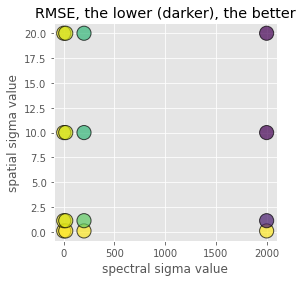

In [39]:
fig = plt.figure(figsize=(4, 4))
plt.title("RMSE, the lower (darker), the better")
plt.xlabel("spectral sigma value")
plt.ylabel("spatial sigma value")
plt.scatter(spect_val, spat_val,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=rmse_val)
plt.show()

###PSNR

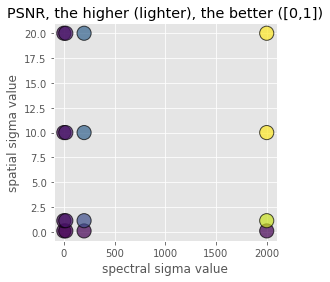

In [40]:
fig = plt.figure(figsize=(4, 4))
plt.title("PSNR, the higher (lighter), the better ([0,1])")
plt.xlabel("spectral sigma value")
plt.ylabel("spatial sigma value")
plt.scatter(spect_val, spat_val,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=psnr_val)
plt.show()

###SSIM

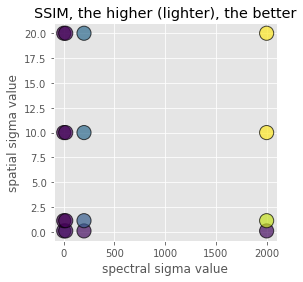

In [54]:
fig = plt.figure(figsize=(4, 4))
plt.title("SSIM, the higher (lighter), the better")
plt.xlabel("spectral sigma value")
plt.ylabel("spatial sigma value")
plt.scatter(spect_val, spat_val,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=ssim_val)
plt.show()

### Image results - changing sigmas

In [55]:
spatial = [0.1, 1.13, 10, 20]
spectral= [0.2, 20, 200, 2000]

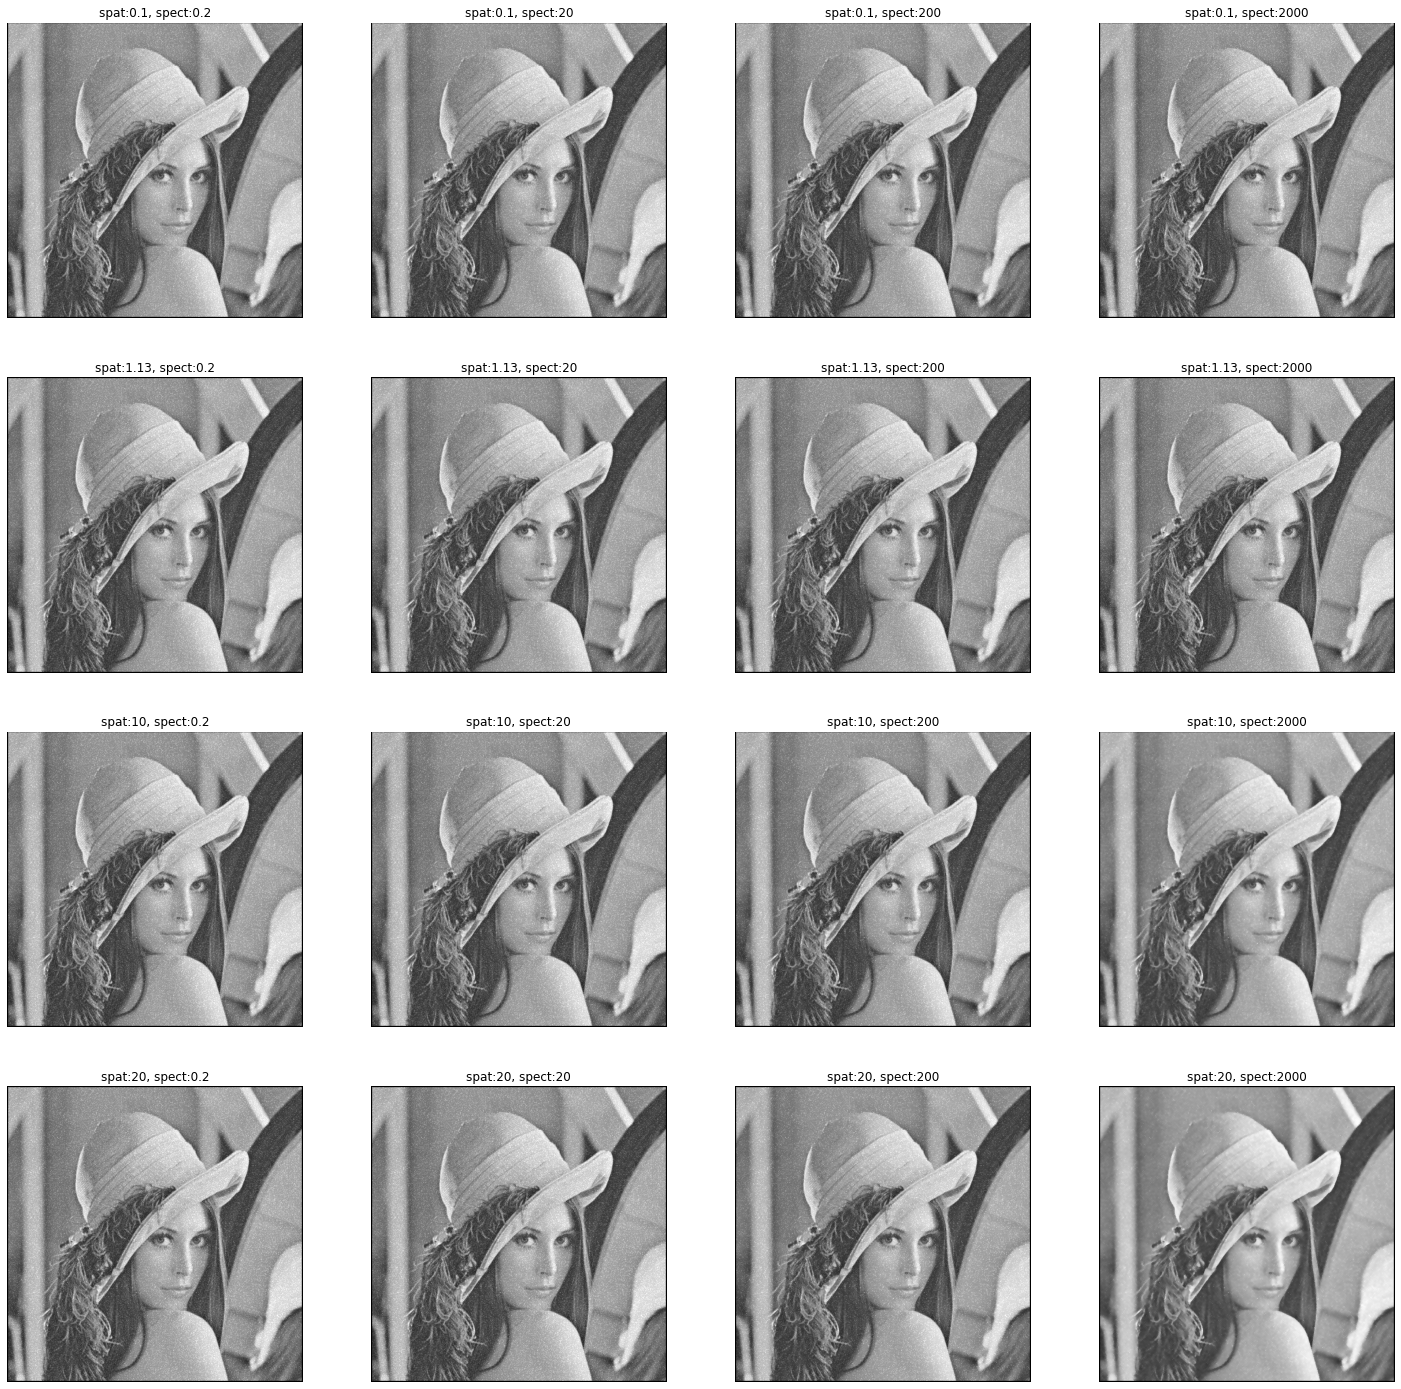

In [ ]:
fig = plt.figure(figsize=(25, 25))
n=1
ax = []
for i in range(0,4):
  for j in range(0,4):
    img = plt.imread('our_bilateral_'+str(j)+'_'+str(i)+'.png')
    ax.append(fig.add_subplot(4,4,n))
    ax[-1].set_title('spat:'+str(spatial[i])+', spect:' + str(spectral[j]))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    n+=1
plt.show()

## Bilateral - OpenCV comparison

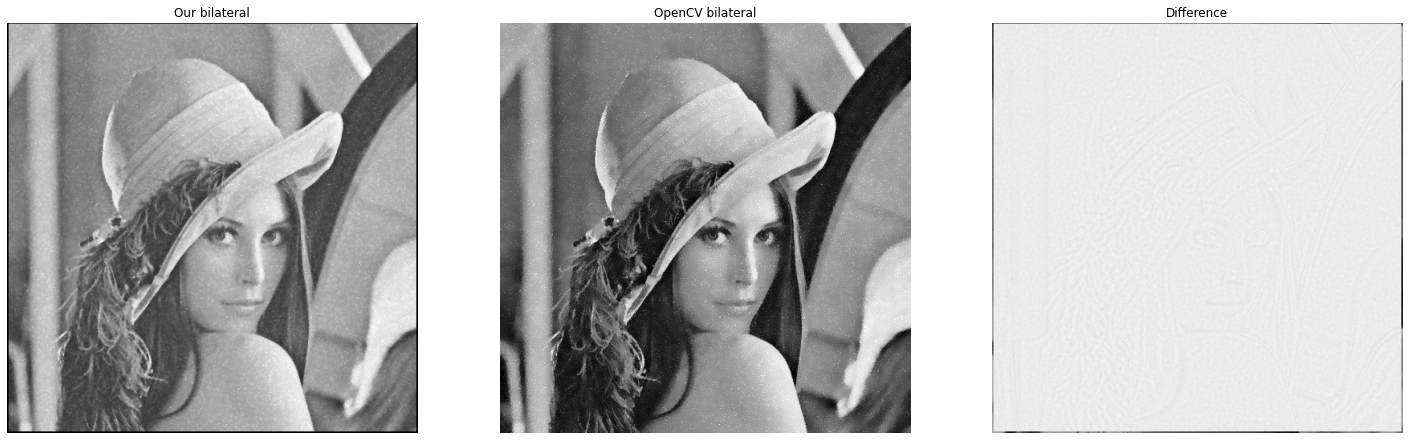

In [ ]:
fig = plt.figure(figsize=(25, 25))
n=1
ax = []

our = plt.imread('our_bilateral.png')
ax.append(fig.add_subplot(1,3,1))
ax[-1].set_title('Our bilateral')
plt.axis('off')
plt.imshow(our, cmap='gray')

opencv = plt.imread('opencv_bilateral.png')
ax.append(fig.add_subplot(1,3,2))
ax[-1].set_title('OpenCV bilateral')
plt.axis('off')
plt.imshow(opencv, cmap='gray')

img = our - opencv
ax.append(fig.add_subplot(1,3,3))
ax[-1].set_title('Difference')
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.show()

# Subtask 2 - Usampling

## Data

In [44]:
metrics = ['data', 'rmse', 'psnr', 'ssim','duration', 'duration_cv', 'rmse_cv', 'psnr_cv', 'ssim_cv', 'duration_cv_nn']

metrics_val = [["aloe",26.1569,19.7791,0.0725729,1.40931,0.000196752,0.000161589,25.5171,19.9942,0.070448,27.0154,19.4986,0.0655871],
["baby1",24.6723,20.2866,0.0846205,1.3499,0.00013703,0.000200457,23.4832,20.7157,0.0815908,24.9487,20.1899,0.0771333],
["bowling1",34.4545,17.3859,0.0438825,1.15145,9.7086e-05,0.000181899,32.3004,17.9466,0.0424546,33.9468,17.5148,0.0400265],
["cloth4",9.41349,28.6558,0.0924776,1.56369,9.2133e-05,0.000116985,8.73442,29.3061,0.0926172,9.28811,28.7723,0.0920774],
["flowerpots",15.5175,24.3144,0.0639381,1.3185,0.000102051,0.000164522,15.3063,24.4334,0.0629057,16.6468,23.7042,0.0619244],
["midd1",10.2339,27.93,0.0617981,1.32908,0.000105549,0.000122172,9.52446,28.554,0.0624845,9.90899,28.2102,0.0619558],
["book7",4.84246,34.4295,0.0926163,1.32657,0.000118946,0.000182485,4.14788,35.7743,0.0934713,4.7629,34.5734,0.091865],
["book2",4.70539,34.6789,0.0449126,1.36471,0.000121553,0.000141496,3.72561,36.7069,0.0450655,4.32249,35.4161,0.0449207],
["book3",5.63922,33.1064,0.0362966,1.43985,0.000115322,0.000131977,4.92343,34.2854,0.0362284,5.98618,32.5878,0.035983],
["book4",6.94954,31.2917,0.0480947,1.34425,0.000123798,0.000135206,6.62591,31.7059,0.0478007,7.45045,30.6872,0.0475811],
["book5",6.56373,31.7878,0.0414829,1.31772,0.000127163,0.000136685,5.8176,32.8359,0.041285,6.61414,31.7213,0.041025],
["book6",6.6558,31.6668,0.0300454,1.34641,0.000120545,0.0001743,5.84822,32.7903,0.0299767,6.92274,31.3252,0.0297946]]

datasets = [item[0] for item in metrics_val]
rmse_val = [item[1] for item in metrics_val]
psnr_val = [item[2] for item in metrics_val]
ssim_val = [item[3] for item in metrics_val]
runtime = [item[4] for item in metrics_val]
runtime_cv = [item[5] for item in metrics_val]
runtime_cv_nn = [item[6] for item in metrics_val]
rmse_val_cv = [item[7] for item in metrics_val]
psnr_val_cv = [item[8] for item in metrics_val]
ssim_val_cv = [item[9] for item in metrics_val]
rmse_val_cv_nn = [item[10] for item in metrics_val]
psnr_val_cv_nn = [item[11] for item in metrics_val]
ssim_val_cv_nn = [item[12] for item in metrics_val]

### Metrics comparison

###Duration

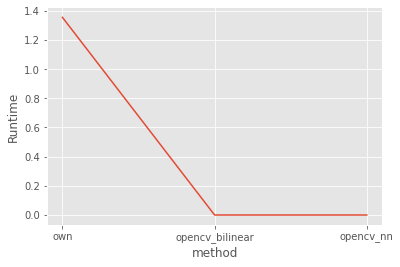

In [42]:
plt.plot(["own","opencv_bilinear","opencv_nn"], [np.mean(runtime), np.mean(runtime_cv), np.mean(runtime_cv_nn)])
plt.xlabel('method')
plt.ylabel('Runtime')
plt.show()

Comparing RMSE, PSNR, SSIM, duration value averages for my implementation and the opencv bilateral implementation

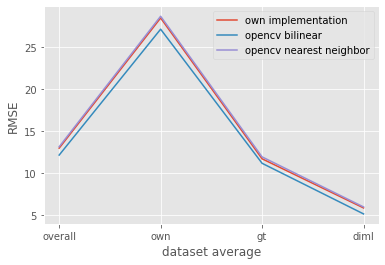

In [45]:
plt.plot(["overall", "own", "gt", "diml"], [np.mean(rmse_val), np.mean(rmse_val[0:3]), np.mean(rmse_val[3:6]), np.mean(rmse_val[6:12])], label="own implementation")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(rmse_val_cv), np.mean(rmse_val_cv[0:3]), np.mean(rmse_val_cv[3:6]), np.mean(rmse_val_cv[6:12])], label="opencv bilinear")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(rmse_val_cv_nn), np.mean(rmse_val_cv_nn[0:3]), np.mean(rmse_val_cv_nn[3:6]), np.mean(rmse_val_cv_nn[6:12])], label="opencv nearest neighbor")
plt.legend(loc="upper right")
plt.xlabel('dataset average')
plt.ylabel('RMSE')
plt.show()

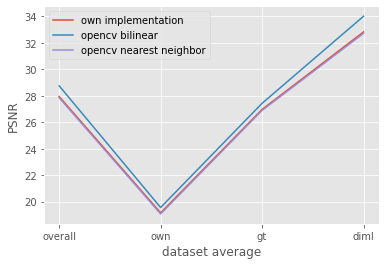

In [46]:
plt.plot(["overall", "own", "gt", "diml"], [np.mean(psnr_val), np.mean(psnr_val[0:3]), np.mean(psnr_val[3:6]), np.mean(psnr_val[6:12])], label="own implementation")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(psnr_val_cv), np.mean(psnr_val_cv[0:3]), np.mean(psnr_val_cv[3:6]), np.mean(psnr_val_cv[6:12])], label="opencv bilinear")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(psnr_val_cv_nn), np.mean(psnr_val_cv_nn[0:3]), np.mean(psnr_val_cv_nn[3:6]), np.mean(psnr_val_cv_nn[6:12])], label="opencv nearest neighbor")
plt.legend(loc="upper left")
plt.xlabel('dataset average')
plt.ylabel('PSNR')
plt.show()

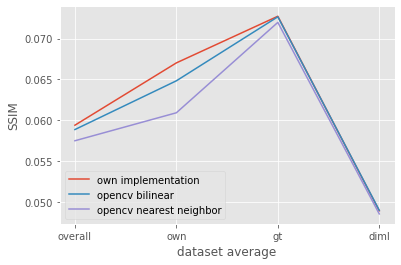

In [47]:
plt.plot(["overall", "own", "gt", "diml"], [np.mean(ssim_val), np.mean(ssim_val[0:3]), np.mean(ssim_val[3:6]), np.mean(ssim_val[6:12])], label="own implementation")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(ssim_val_cv), np.mean(ssim_val_cv[0:3]), np.mean(ssim_val_cv[3:6]), np.mean(ssim_val_cv[6:12])], label="opencv bilinear")
plt.plot(["overall", "own", "gt", "diml"], [np.mean(ssim_val_cv_nn), np.mean(ssim_val_cv_nn[0:3]), np.mean(ssim_val_cv_nn[3:6]), np.mean(ssim_val_cv_nn[6:12])], label="opencv nearest neighbor")
plt.legend(loc="lower left")
plt.xlabel('dataset average')
plt.ylabel('SSIM')
plt.show()


## Visualization

### RGB Original vs. Depth vs. Upsampled (own) vs. OpenCV

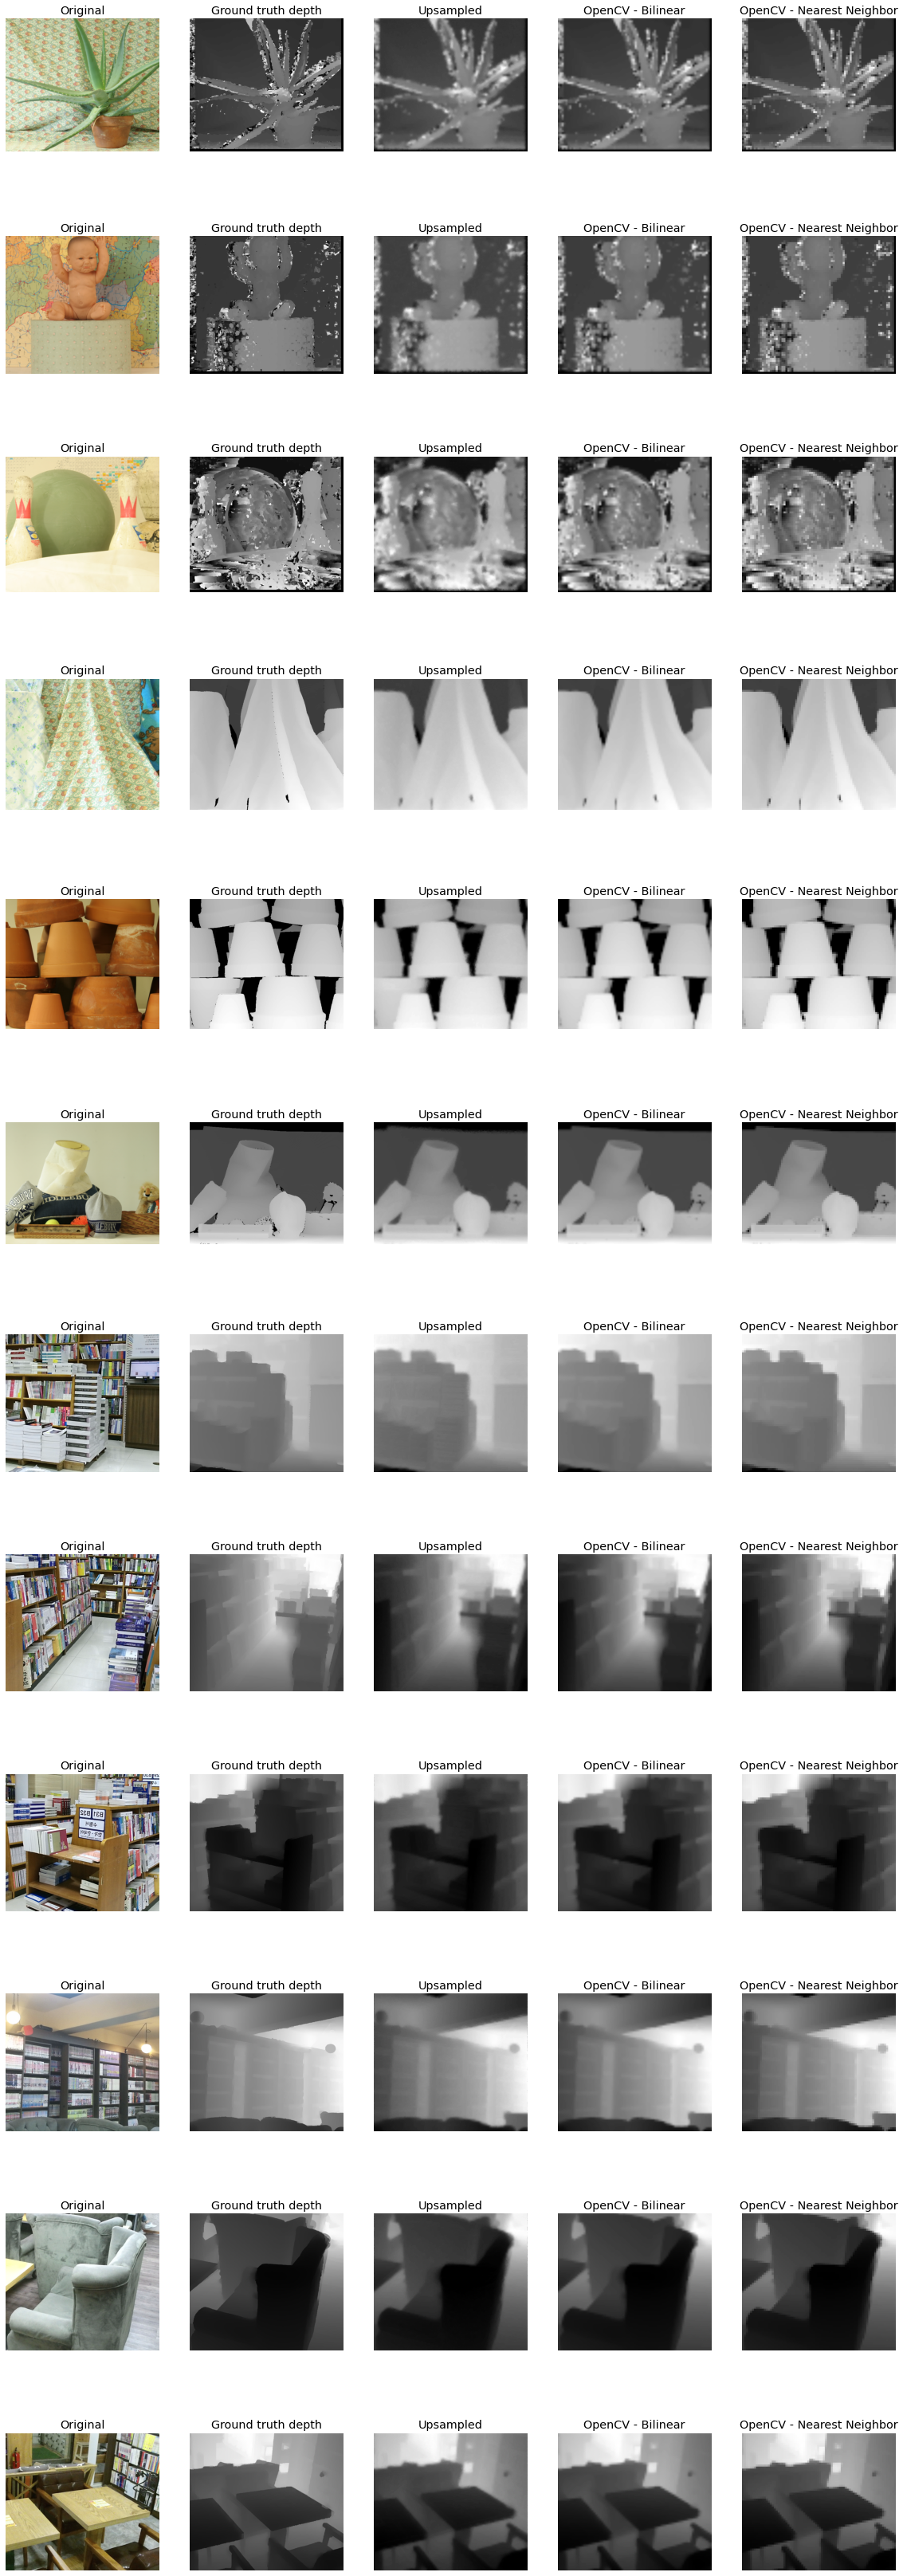

In [50]:
files = [item[0] for item in metrics_val]
fig = plt.figure(figsize=(20, 60))
n=1
ax = []
for j in range(0,12):
    orig = plt.imread(files[j] + '_rgb.png', 0)
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Original")
    plt.axis('off')
    plt.imshow(orig, cmap='gray')
    n+=1

    gt = plt.imread(files[j] + '_depth.png', 0)
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Ground truth depth")
    plt.axis('off')
    plt.imshow(gt, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_upsampled.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Upsampled")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_cv.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("OpenCV - Bilinear")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_cv_nn.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("OpenCV - Nearest Neighbor")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1
plt.show()

### Diff images

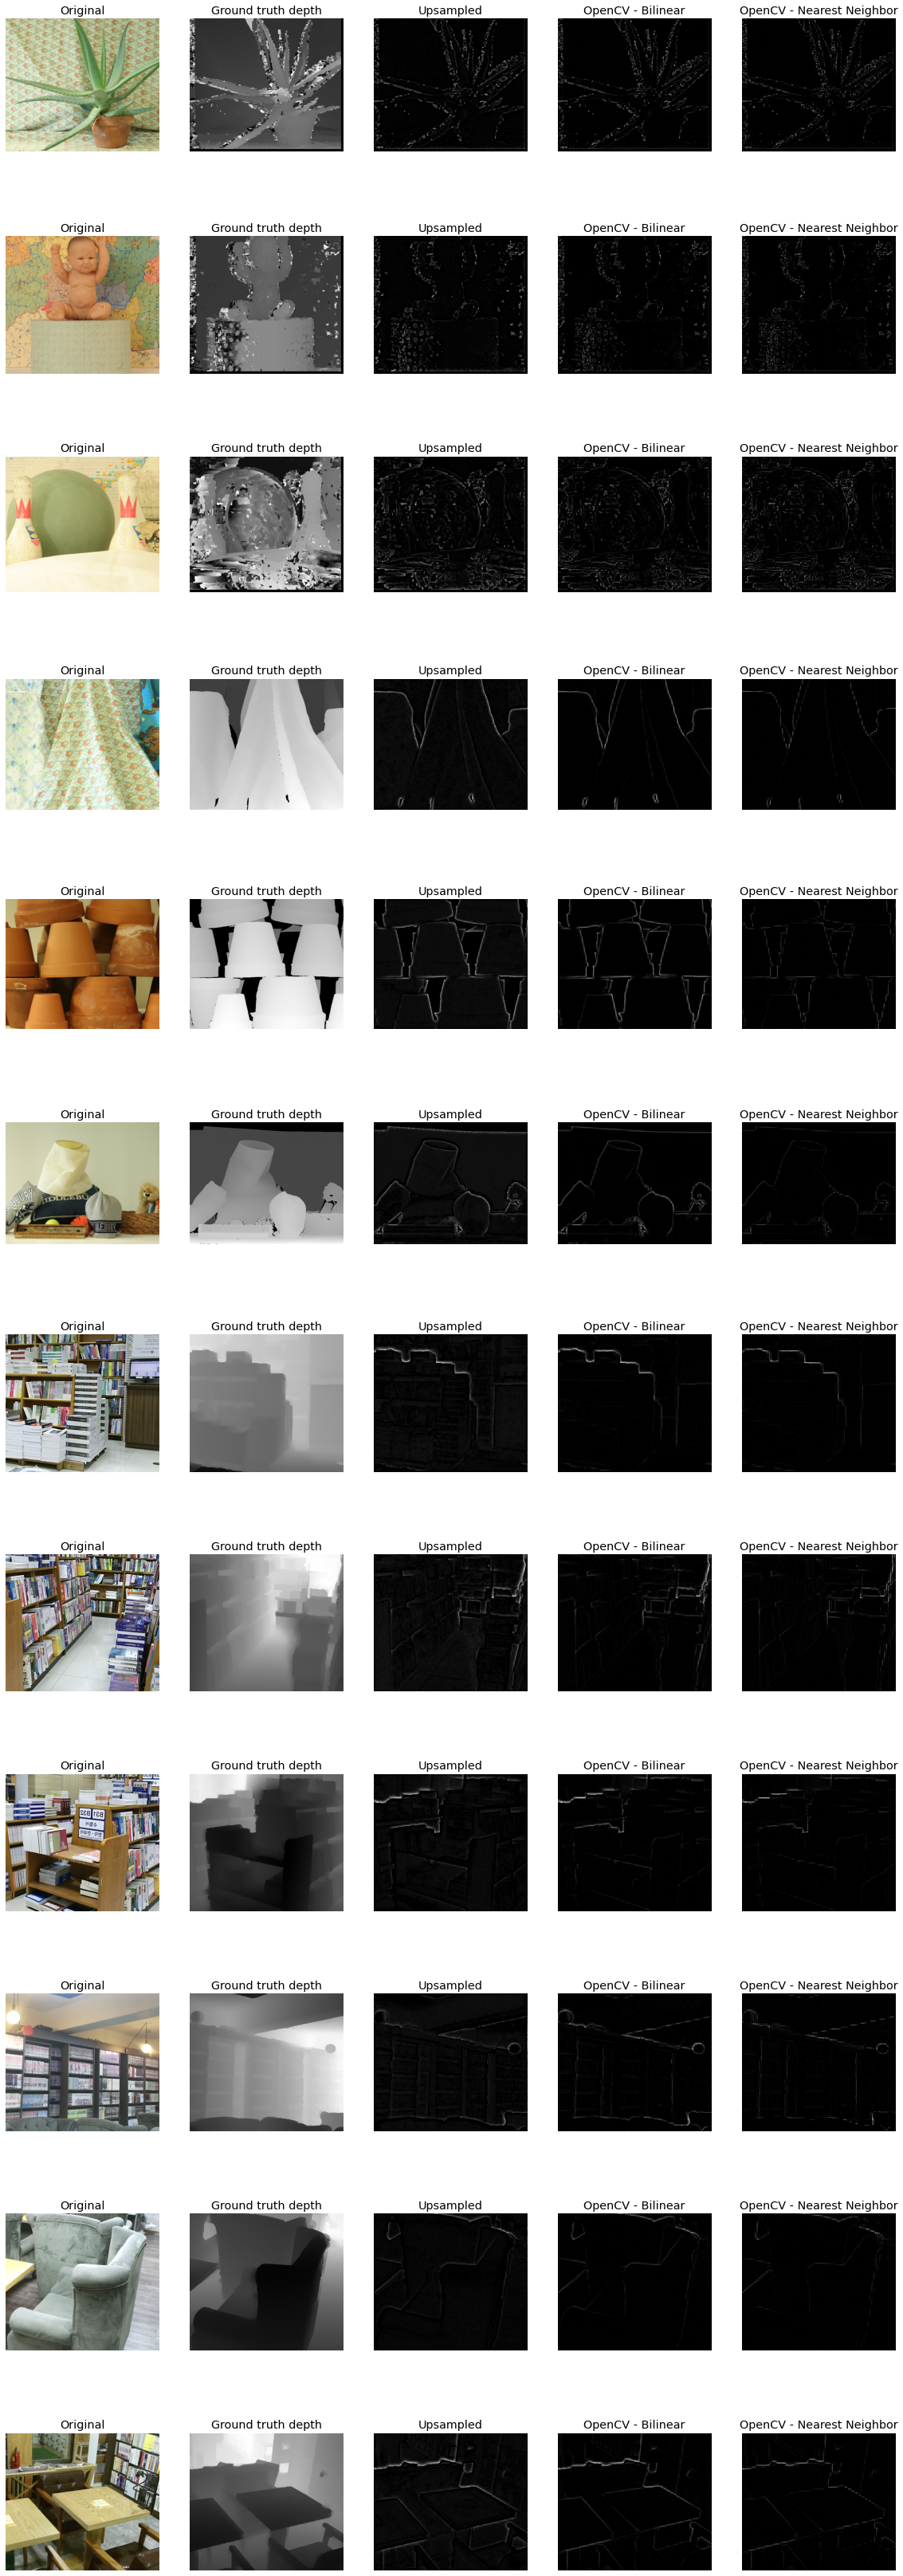

In [51]:
files = [item[0] for item in metrics_val]
fig = plt.figure(figsize=(20, 60))
n=1
ax = []
for j in range(0,12):
    orig = plt.imread(files[j] + '_rgb.png', 0)
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Original")
    plt.axis('off')
    plt.imshow(orig, cmap='gray')
    n+=1

    gt = plt.imread(files[j] + '_depth.png', 0)
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Ground truth depth")
    plt.axis('off')
    plt.imshow(gt, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_diff.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("Upsampled")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_cvdiff.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("OpenCV - Bilinear")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1

    up = plt.imread(files[j] + '_cvnndiff.png')
    ax.append(fig.add_subplot(12,5,n))
    ax[-1].set_title("OpenCV - Nearest Neighbor")
    plt.axis('off')
    plt.imshow(up, cmap='gray')
    n+=1
plt.show()